In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
dataset=pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
y=dataset["Species"]
x=dataset.drop("Species",axis=1)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
116,117,6.5,3.0,5.5,1.8
13,14,4.3,3.0,1.1,0.1
5,6,5.4,3.9,1.7,0.4
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3


In [13]:
reg=linear_model.LogisticRegression(C=0.01,max_iter=1000)
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
accuracy_score(y_predict,y_test)

1.0

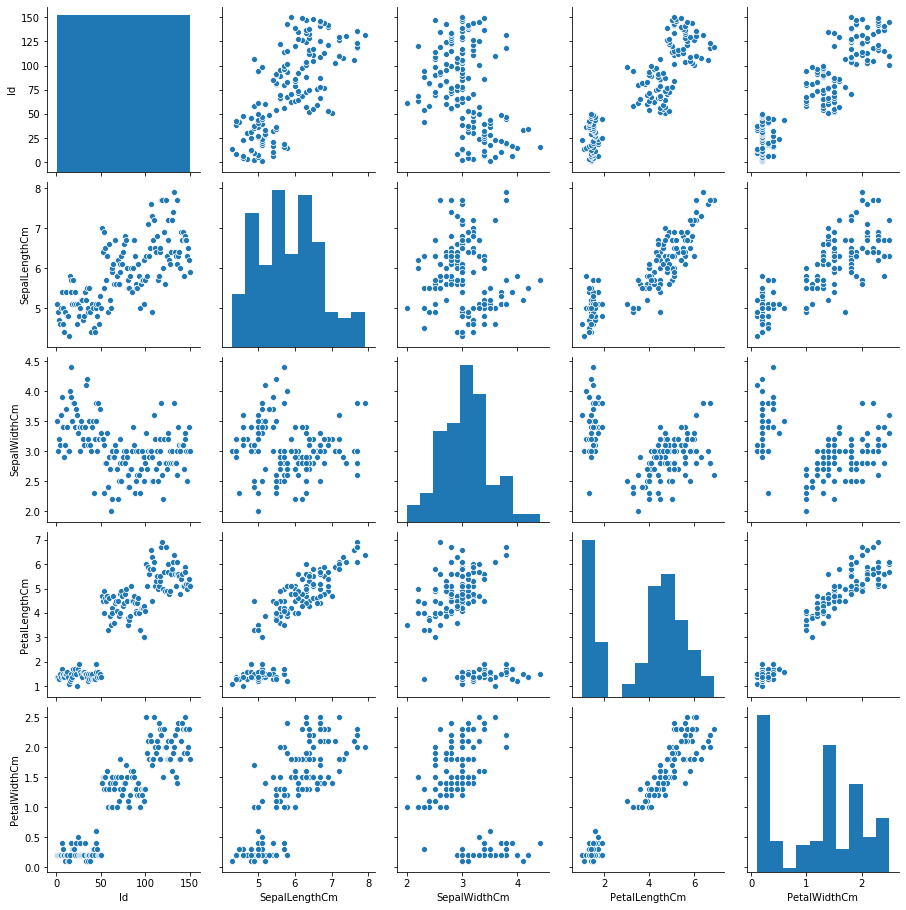

In [9]:
sns.pairplot(dataset)



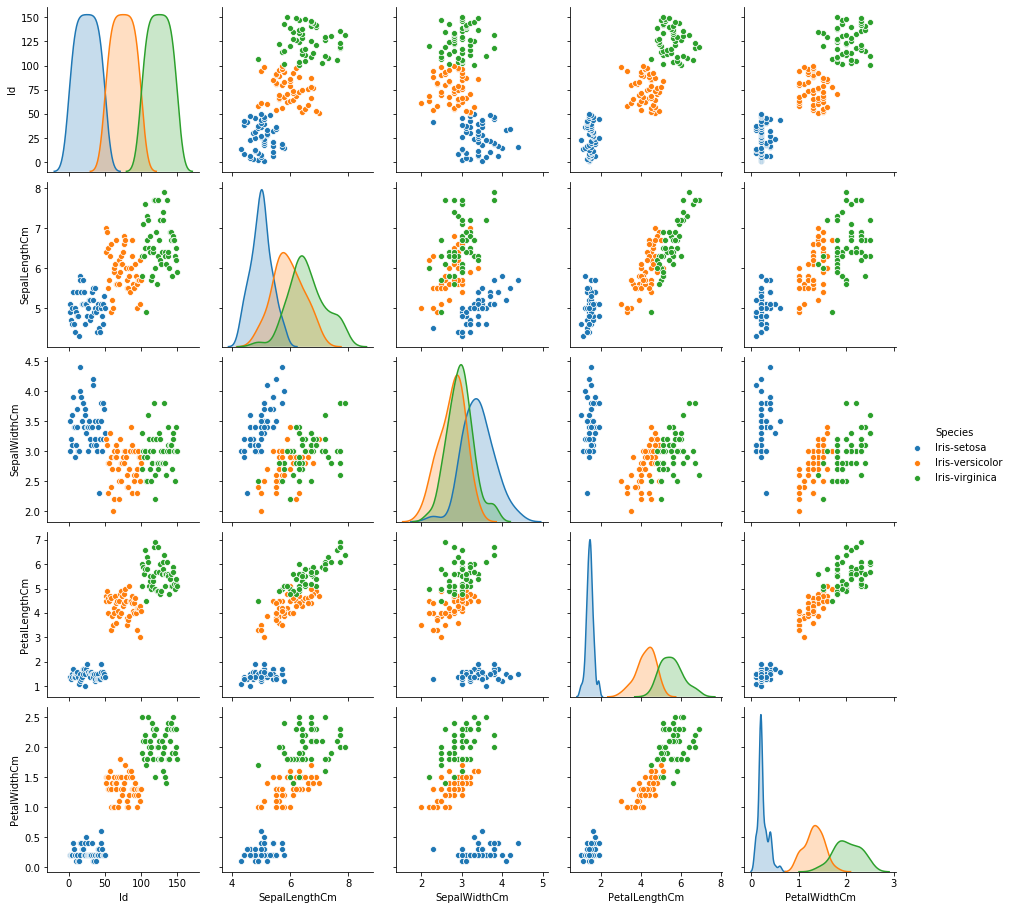

In [10]:
sns.pairplot(dataset,hue="Species")

In [14]:
print(y_predict)
y_test.head(100)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


33         Iris-setosa
64     Iris-versicolor
143     Iris-virginica
22         Iris-setosa
28         Iris-setosa
101     Iris-virginica
90     Iris-versicolor
117     Iris-virginica
112     Iris-virginica
93     Iris-versicolor
118     Iris-virginica
95     Iris-versicolor
104     Iris-virginica
16         Iris-setosa
66     Iris-versicolor
6          Iris-setosa
26         Iris-setosa
71     Iris-versicolor
21         Iris-setosa
126     Iris-virginica
9          Iris-setosa
1          Iris-setosa
63     Iris-versicolor
4          Iris-setosa
41         Iris-setosa
144     Iris-virginica
29         Iris-setosa
34         Iris-setosa
120     Iris-virginica
97     Iris-versicolor
77     Iris-versicolor
88     Iris-versicolor
15         Iris-setosa
124     Iris-virginica
140     Iris-virginica
58     Iris-versicolor
59     Iris-versicolor
52     Iris-versicolor
50     Iris-versicolor
72     Iris-versicolor
36         Iris-setosa
67     Iris-versicolor
8          Iris-setosa
123     Iri

In [15]:
confusion_matrix(y_predict,y_test)

array([[17,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 16]])

So we can see that the output comes as expected and our model has predicted the output correctly

In [20]:
import sqlite3
cnn=sqlite3.connect("database.sqlite")
print(cnn)
dataset2=pd.read_sql_query("SELECT * FROM Iris", cnn)
dataset2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


By this way we can load database.sqlite files in pandas as our dataframe
